# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?
**Answer:** 

Yes the distribution can be assumed normal due to the following observations --- 


(a) Visually it "looks" kind of normal.

(b) The mean (98.249) very close to the median (98.3). Mode is 98.0.

(c) Kurtossis = 0.648, which is slight greater than 0.

(d) Skewness = -0.00431, which is close to 0.

(e) Based on ECDF plot, the data looks symmetrical.

(f) Using a Q-Q Plot, the distribution follows roughly a straight 45d line. 

(a)

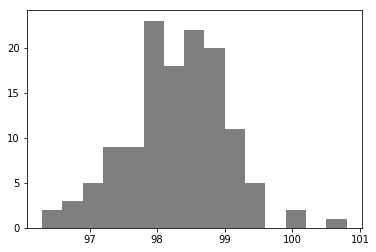

In [3]:
# Plot all temperature data
plt.hist(df.temperature,bins=15,color='black',alpha=0.5)
plt.show()

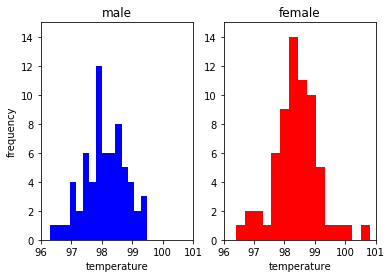

In [4]:
# Plot all temperature data based on male vs female
plt.clf()
plt.subplot(1,2,1)
plt.hist(df.temperature[df.gender=='M'],bins=15,color='blue')
plt.xlim(96,101)
plt.ylim(0,15)
plt.title('male')
plt.xlabel('temperature')
plt.ylabel('frequency')

plt.subplot(1,2,2)
plt.hist(df.temperature[df.gender=='F'],bins=15,color='red')
plt.xlim(96,101)
plt.ylim(0,15)
plt.title('female')
plt.xlabel('temperature')

plt.show()

(b)

In [5]:
t_mean = df.temperature.mean()
print(f'The mean of the data is {t_mean}')

The mean of the data is 98.24923076923078


In [6]:
t_median = df.temperature.median()
print(f'The median of the data is {t_median}')

The median of the data is 98.3


In [7]:
t_mode = df.temperature.mode()
print(f'The mode of the data is {t_mode[0]}')

The mode of the data is 98.0


In [8]:
t_std = df.temperature.std()
print(f'The standard deviation of the data is {t_std}')

The standard deviation of the data is 0.7331831580389454


(c)

In [9]:
kurt = (sum((df.temperature - t_mean)**4)/t_std**4 / (len(df.temperature)))-3
print(f'The kurtosis of the data is {kurt}')

The kurtosis of the data is 0.6481796324871225


(d)

In [10]:
skew = sum((df.temperature - t_mean)**3/t_std**3) / len(df.temperature)
print(f'The skewness of the data is {skew}')

The skewness of the data is -0.004317674193160269


(e) Create ECDF Plot and determine whether the mean is at about 0.5

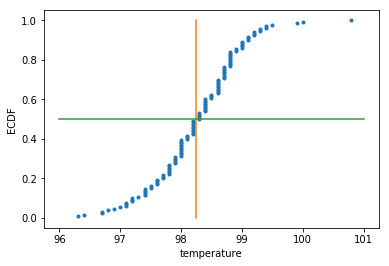

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n

    return x, y

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df.temperature)

# Generate plot
plt.plot(x_vers,y_vers,marker='.',linestyle='none')
plt.plot([t_mean,t_mean],[0,1])
plt.plot([96,101],[0.5,0.5])

# Label the axes
plt.xlabel('temperature')
plt.ylabel('ECDF')

# Display the plot
plt.show()

(f) Examine using Q-Q Plot

In [12]:
df_QQ = df.copy()
df_QQ_sorted = df_QQ.sort_values('temperature')
df_QQ_sorted_reind = df_QQ_sorted.reset_index()
df_QQ_sorted_reind['i']=df_QQ_sorted_reind.index.values + 1
df_QQ_sorted_reind['%tile']= (df_QQ_sorted_reind['i']-0.5)/130
df_QQ_sorted_reind['z_theo']= st.norm.ppf(df_QQ_sorted_reind['%tile'])
df_QQ_sorted_reind['z_sample'] = (df_QQ_sorted_reind.temperature-t_mean)/t_std
df_QQ_sorted_reind.head(5)

,index,temperature,gender,heart_rate,i,%tile,z_theo,z_sample
0,125,96.3,M,70.0,1,0.003846,-2.665285,-2.658586
1,39,96.4,F,69.0,2,0.011538,-2.272159,-2.522195
2,11,96.7,F,62.0,3,0.019231,-2.069902,-2.113020
3,105,96.7,M,71.0,4,0.026923,-1.928072,-2.113020
4,95,96.8,F,75.0,5,0.034615,-1.816911,-1.976629


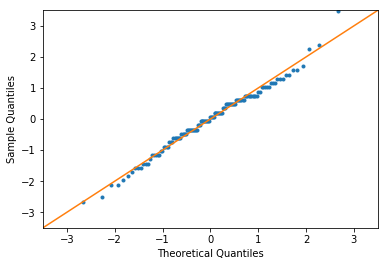

In [13]:
plt.plot(df_QQ_sorted_reind['z_theo'],df_QQ_sorted_reind['z_sample'],marker='.',linestyle='None')
plt.plot([-3.5,3.5],[-3.5,3.5])
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

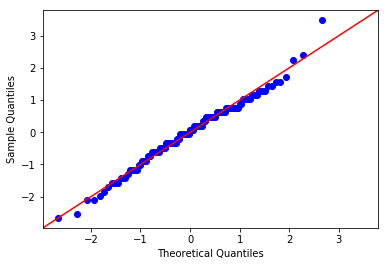

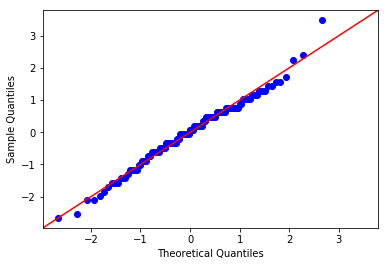

In [14]:
z = (df['temperature'] - t_mean) / t_std
sm.qqplot(z, line='45', a=0.5)

In [15]:
st.mstats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

### 2. Is the sample size large? Are the observations independent?
**Answer:** 

- Yes, sample size is large for central limit theorem to hold. n = 130 > 30.

- Yes the observations were independednt. Based on the information obtained, (148) participants were healthy men and women aged 18 through 40 years participated, which is <<<10% of the population. Also assumed that the participants were randomly selected.
< https://www.ncbi.nlm.nih.gov/pubmed/1302471 >

### 3. Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  t  or  z  statistic?
- Now try using the other test. How is the result be different? Why?

**Answer:** 

- The p-value is 0.0, < 0.05. Reject null hypothesis.

- A z-score of -5.455 equals p-value of 0.0, < 0.05. Reject null hypothesis. One sample is used because we only have one sample data.

- It is more appropriate to use z statistic because the sample data size is 130, which is > 30.

- A t-score of -5.434 / one-tail / degfree = 130-1=129 gives p-value of 0.00001, practically 0 and < 0.05. Reject null hypothesis.


In [16]:
# Bootstrap hypothesis test
# Null hypothesis H_o: true population mean is 98.6
# Alternative hypothesis H_a: true population mean is not 98.6
# Significance level = 0.05

# t_mean = mean of sample data = 98.249
# h_mean = assumed mean based on hypothesis

h_mean = 98.6 
mean_shift = h_mean - t_mean
temperature_shifted = df.temperature + mean_shift 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Take 10,000 bootstrap replicates of the mean of the shifted temperature data: bs_replicates
bs_replicates_shifted = draw_bs_reps(temperature_shifted,np.mean,10000)

# Compute p-value: p
p = np.sum(bs_replicates_shifted <= t_mean) / len(bs_replicates_shifted)

print(f'The p-value is {p}, < 0.05. Reject null hypothesis.')

The p-value is 0.0, < 0.05. Reject null hypothesis.


In [17]:
# Frequentist hypothesis test
# Null hypothesis H_o: true population mean is 98.6
# Alternative hypothesis H_a: true population mean is not 98.6
# Significance level = 0.05

z = (t_mean - h_mean) / (t_std / (len(df.temperature))**0.5)

print(f'Z-score of {z} equals p-value of 0.0, < 0.05. Reject null hypothesis.')

Z-score of -5.454823292364079 equals p-value of 0.0, < 0.05. Reject null hypothesis.


In [18]:
t = (t_mean - h_mean) / (t_std / (len(df.temperature)-1)**0.5)
print(f't-score of {t} equals p-value of 0.00001, < 0.05. Reject null hypothesis.')

t-score of -5.433802700523669 equals p-value of 0.00001, < 0.05. Reject null hypothesis.


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

- Which one is the correct one to use?

- What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

**Answer:** 

- t statistic should be used because the same size is 10, which is < 30.

- t score leads to higher p-value. At a draw of 10, many times the random draw leads to p-value of >0.05 for both statistics. As the sample size increases, less random draws have p-value >0.05 for both z and t statistics.

In [19]:
# Frequentist hypothesis test
# Null hypothesis H_o: true population mean is 98.6
# Alternative hypothesis H_a: true population mean is not 98.6
# Significance level = 0.05

sample_10 = []

for i in range(10):
    sample_10.append(np.random.choice(df.temperature))

t_10_mean = np.mean(sample_10)
t_10_std = np.std(sample_10)

z_10 = (t_10_mean - h_mean) / (t_std / (len(sample_10))**0.5)

t_10 = (t_10_mean - h_mean) / (t_std / (len(sample_10)-1)**0.5)


p_val_z_10 = 1- st.norm.sf(z_10)

p_val_t_10 = 1- st.t.sf(t_10, len(sample_10)-1)

print(f'z-score of {z_10} equals p-value of {p_val_z_10}')

print(f't-score of {t_10} equals p-value of {p_val_t_10}')

z-score of -0.905746812858548 equals p-value of 0.18253493924871877
t-score of -0.8592668736213888 equals p-value of 0.20624725079698858


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

**Answer:** 

- The two approaches yield similar results.

In [20]:
# Using Bootstrap approach
# Assuming "normal" is within 95% confidence interval and "abnormal" is outside confidence interval of the mean temperature

# Take 10,000 bootstrap samples of temperature data:

bs_sample = []

for i in range(10000):
    bs_sample.append(np.random.choice(df.temperature))

conf_interval = np.percentile(bs_sample,[2.5,97.5])

print(f' Body temperature is "abnormal" if it is outside this range {conf_interval}')

 Body temperature is "abnormal" if it is outside this range [96.7 99.5]


In [21]:
# Using Frequentist approach --- z statistic

t_bs_mean = np.mean(bs_sample)
t_bs_std = np.std(bs_sample)

z_score_2p5 = st.norm.ppf(0.025)
z_score_97p5 = st.norm.ppf(0.975)

x_z_2p5 = z_score_2p5 * (t_bs_std ) + t_bs_mean
x_z_97p5 = z_score_97p5 * (t_bs_std ) + t_bs_mean

print(f' Body temperature is "abnormal" if it is outside this range [{round(x_z_2p5,1)} {round(x_z_97p5,1)}]')

 Body temperature is "abnormal" if it is outside this range [96.8 99.7]


### 6. Is there a significant difference between males and females in normal temperature?

- What testing approach did you use and why?

- Write a story with your conclusion in the context of the original problem.

**Answer:** 

- Boostrap approach was used.

- There is significant difference between male and female mean body temperature. Rejecting the null hypothesis suggests that male and female do not have the same mean temperature.

In [25]:
temp_male = df.temperature[df.gender=='M'].values
temp_female = df.temperature[df.gender=='F'].values
t_male_mean = np.mean(temp_male)
t_female_mean = np.mean(temp_female)

print(f'The sample mean of the body temperature for male is {round(t_male_mean,3)} and for female is {round(t_female_mean,3)}')

The sample mean of the body temperature for male is 98.105 and for female is 98.394


In [73]:
# Bootstrap hypothesis test
# Null hypothesis H_o: male and female have the same mean temperature
# Alternative hypothesis H_a: male and female DO NOT have the same mean temperature
# Significance level = 0.05

# t_mean = mean of sample data = 98.249
# t_male_mean = mean of sample data of male = 98.105
# t_female_mean = mean of sample data of female = 98.394

t_male_mean_shifted = temp_male + (t_mean - t_male_mean)
t_female_mean_shifted = temp_female + (t_mean - t_female_mean)

# Take 10,000 bootstrap replicates of the mean of the shifted temperature data
bs_replicates_shifted_male = draw_bs_reps(t_male_mean_shifted,np.mean,10000)
bs_replicates_shifted_female = draw_bs_reps(t_female_mean_shifted,np.mean,10000)

# Get replicates of difference of means
bs_replicates = bs_replicates_shifted_female - bs_replicates_shifted_male

# Compute and print p-value: p
p = np.sum(bs_replicates > (t_female_mean-t_male_mean)) / len(bs_replicates)

print(f'The p-value is {p}, < 0.05. Reject null hypothesis.')

The p-value is 0.0109, < 0.05. Reject null hypothesis.
